In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle
import xgboost as xgb

/workspace/conda/envs/ds/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
with open('output/2/train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('output/2/test.pickle', 'rb') as f:
    test = pickle.load(f)

In [3]:
print(train.data.shape, train.target.shape, train.target.mean())

(10444, 146) (10444,) 0.5


In [4]:
tuner = RandomizedSearchCV(xgb.XGBClassifier(n_estimators=100), {
    'max_depth': [2, 3, 4, 5],
    'gamma': [0, 1, 2, 3],
    'min_child_weight': [0, 1, 2, 3],
}, n_iter=30, refit=False, verbose=5)
tuner.fit(train.data, train.target)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] min_child_weight=2, gamma=1, max_depth=2 ........................
[CV]  min_child_weight=2, gamma=1, max_depth=2, score=0.646755, total=   1.2s
[CV] min_child_weight=2, gamma=1, max_depth=2 ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  min_child_weight=2, gamma=1, max_depth=2, score=0.645319, total=   1.2s
[CV] min_child_weight=2, gamma=1, max_depth=2 ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  min_child_weight=2, gamma=1, max_depth=2, score=0.645115, total=   1.2s
[CV] min_child_weight=1, gamma=0, max_depth=5 ........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s remaining:    0.0s


[CV]  min_child_weight=1, gamma=0, max_depth=5, score=0.658242, total=   2.8s
[CV] min_child_weight=1, gamma=0, max_depth=5 ........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.5s remaining:    0.0s


[CV]  min_child_weight=1, gamma=0, max_depth=5, score=0.662263, total=   2.8s
[CV] min_child_weight=1, gamma=0, max_depth=5 ........................
[CV]  min_child_weight=1, gamma=0, max_depth=5, score=0.652874, total=   2.8s
[CV] min_child_weight=0, gamma=2, max_depth=2 ........................
[CV]  min_child_weight=0, gamma=2, max_depth=2, score=0.651063, total=   1.2s
[CV] min_child_weight=0, gamma=2, max_depth=2 ........................
[CV]  min_child_weight=0, gamma=2, max_depth=2, score=0.646468, total=   1.2s
[CV] min_child_weight=0, gamma=2, max_depth=2 ........................
[CV]  min_child_weight=0, gamma=2, max_depth=2, score=0.647989, total=   1.2s
[CV] min_child_weight=3, gamma=1, max_depth=2 ........................
[CV]  min_child_weight=3, gamma=1, max_depth=2, score=0.645893, total=   1.2s
[CV] min_child_weight=3, gamma=1, max_depth=2 ........................
[CV]  min_child_weight=3, gamma=1, max_depth=2, score=0.645319, total=   1.2s
[CV] min_child_weight=3, gam

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.0min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'max_depth': [2, 3, 4, 5], 'gamma': [0, 1, 2, 3], 'min_child_weight': [0, 1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=False,
          return_train_score=True, scoring=None, verbose=5)

In [5]:
tuner.best_score_, tuner.best_params_

(0.65999617004978939, {'gamma': 3, 'max_depth': 5, 'min_child_weight': 3})

In [6]:
model = xgb.XGBClassifier(**tuner.best_params_)
X_train, X_val, y_train, y_val = train_test_split(train.data, train.target, test_size=1000)
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_set=eval_set, eval_metric='error')

[0]	validation_0-error:0.360546	validation_1-error:0.385
[1]	validation_0-error:0.346463	validation_1-error:0.376
[2]	validation_0-error:0.346146	validation_1-error:0.383
[3]	validation_0-error:0.335557	validation_1-error:0.368
[4]	validation_0-error:0.338416	validation_1-error:0.363
[5]	validation_0-error:0.341487	validation_1-error:0.37
[6]	validation_0-error:0.335451	validation_1-error:0.351
[7]	validation_0-error:0.335875	validation_1-error:0.354
[8]	validation_0-error:0.331533	validation_1-error:0.358
[9]	validation_0-error:0.331427	validation_1-error:0.357
[10]	validation_0-error:0.329839	validation_1-error:0.349
[11]	validation_0-error:0.326874	validation_1-error:0.353
[12]	validation_0-error:0.32698	validation_1-error:0.352
[13]	validation_0-error:0.323592	validation_1-error:0.358
[14]	validation_0-error:0.320309	validation_1-error:0.362
[15]	validation_0-error:0.320945	validation_1-error:0.363
[16]	validation_0-error:0.318615	validation_1-error:0.359
[17]	validation_0-error:0.

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=3, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=3, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

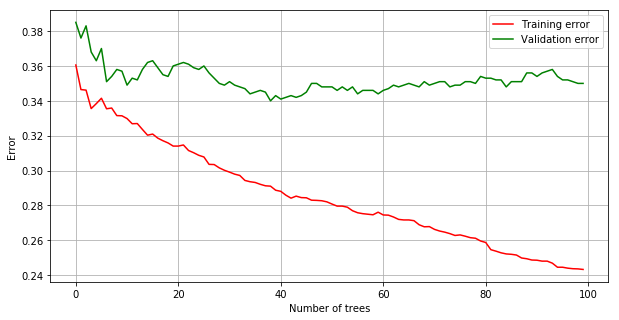

In [7]:
def plot_error(model):
    plt.figure(figsize=(10, 5))
    plt.plot(model.evals_result_['validation_0']['error'], c='r', label='Training error')
    if 'validation_1' in model.evals_result_:
        plt.plot(model.evals_result_['validation_1']['error'], c='g', label='Validation error')
    plt.xlabel('Number of trees')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

plot_error(model)

In [8]:
def report(name, y_true, y_pred):
    print('{} accuracy: {:.3f}'.format(name, accuracy_score(y_true, y_pred)))
    print(classification_report(y_true, y_pred))

report('training', y_train, model.predict(X_train))
report('validation', y_val, model.predict(X_val))

training accuracy: 0.757
             precision    recall  f1-score   support

          0       0.76      0.74      0.75      4736
          1       0.75      0.77      0.76      4708

avg / total       0.76      0.76      0.76      9444

validation accuracy: 0.650
             precision    recall  f1-score   support

          0       0.64      0.63      0.64       486
          1       0.66      0.67      0.66       514

avg / total       0.65      0.65      0.65      1000



In [9]:
feature_importances = pd.DataFrame(list(zip(train.feature_names, model.feature_importances_ * 100)))
feature_importances.rename(columns={0: 'Feature', 1: 'Importance'}, inplace=True)
feature_importances.sort_values(by='Importance', ascending=False)

,Feature,Importance
4,Violations1000,5.516804
1,Y,4.502219
0,X,4.438808
3,Violations20,4.438808
73,Burglary1000,3.804693
70,Larceny1000,3.297400
68,MotorcycleViolations1000,3.043754
130,Calls1000,3.043754
76,Fraud1000,2.980342
79,ObstructingJudiciary1000,2.663285


# Simple neural network

In [10]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    hidden_layer_sizes=[300, 300, 300],
    learning_rate='adaptive',
    validation_fraction=0.2,
    verbose=True,
)
nn.fit(train.data, train.target)

Iteration 1, loss = 7.72905700
Iteration 2, loss = 4.51496447
Iteration 3, loss = 3.89782809
Iteration 4, loss = 3.06112113
Iteration 5, loss = 2.13262769
Iteration 6, loss = 1.53234133
Iteration 7, loss = 1.58183494
Iteration 8, loss = 1.42132515
Iteration 9, loss = 1.14621616
Iteration 10, loss = 1.11693602
Iteration 11, loss = 0.91731306
Iteration 12, loss = 1.00186730
Iteration 13, loss = 0.87945407
Iteration 14, loss = 0.85743946
Iteration 15, loss = 0.87569216
Iteration 16, loss = 0.88992081
Iteration 17, loss = 0.91750220
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[300, 300, 300], learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=True, warm_start=False)

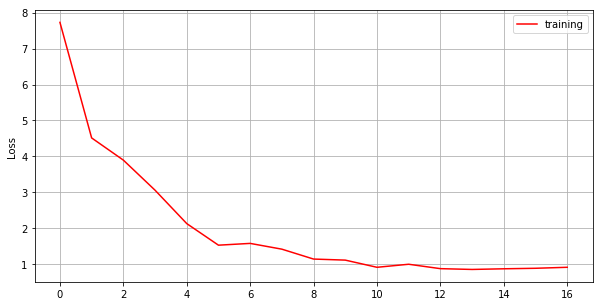

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(nn.loss_curve_, c='r', label='training')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [12]:
report('train', train.target, nn.predict(train.data))

train accuracy: 0.589
             precision    recall  f1-score   support

          0       0.56      0.78      0.66      5222
          1       0.65      0.40      0.49      5222

avg / total       0.60      0.59      0.57     10444



# Final model

In [13]:
model = xgb.XGBClassifier(**tuner.best_params_)
eval_set = [(train.data, train.target)]
model.fit(train.data, train.target, eval_set=eval_set, eval_metric='error')

[0]	validation_0-error:0.37026
[1]	validation_0-error:0.364803
[2]	validation_0-error:0.358483
[3]	validation_0-error:0.357813
[4]	validation_0-error:0.351398
[5]	validation_0-error:0.346898
[6]	validation_0-error:0.345653
[7]	validation_0-error:0.34393
[8]	validation_0-error:0.339046
[9]	validation_0-error:0.336078
[10]	validation_0-error:0.334833
[11]	validation_0-error:0.334642
[12]	validation_0-error:0.330525
[13]	validation_0-error:0.327461
[14]	validation_0-error:0.326886
[15]	validation_0-error:0.328035
[16]	validation_0-error:0.326407
[17]	validation_0-error:0.325163
[18]	validation_0-error:0.323344
[19]	validation_0-error:0.324301
[20]	validation_0-error:0.321237
[21]	validation_0-error:0.316928
[22]	validation_0-error:0.317024
[23]	validation_0-error:0.309843
[24]	validation_0-error:0.311375
[25]	validation_0-error:0.309077
[26]	validation_0-error:0.307641
[27]	validation_0-error:0.307353
[28]	validation_0-error:0.303045
[29]	validation_0-error:0.302949
[30]	validation_0-erro

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=3, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=3, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

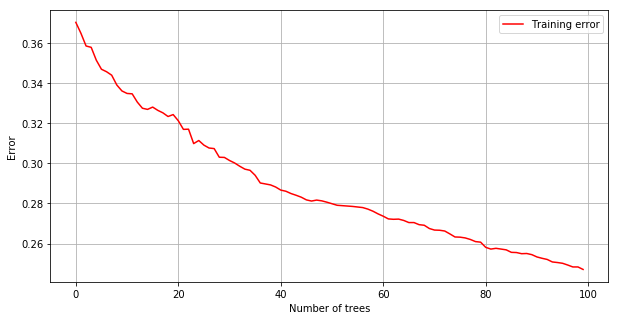

In [14]:
plot_error(model)

In [15]:
report('test', test.target, model.predict(test.data))

test accuracy: 0.647
             precision    recall  f1-score   support

          0       0.65      0.65      0.65      1000
          1       0.65      0.65      0.65      1000

avg / total       0.65      0.65      0.65      2000

